In [3]:
#univariate feature selection

from sklearn.feature_selection import SelectPercentile

import os, mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data),50))
X_w_noise=np.hstack([cancer.data,noise])
X_train,X_test,y_train,y_test=train_test_split(X_w_noise,cancer.target,random_state=0,test_size=0.5)

select=SelectPercentile(percentile=50) #selects 50% of features
X_train_selected=select.fit_transform(X_train,y_train)

print(X_train.shape)
print(X_train_selected.shape)

(284, 80)
(284, 40)


In [4]:
mask=select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


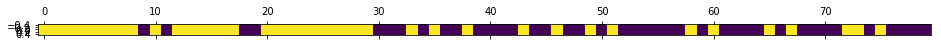

In [5]:
plt.matshow(mask.reshape(1,-1))
plt.show()

In [6]:
#notice, most retained features were the originals, most noise features were removed

In [7]:
X_test_selected=select.transform(X_test)
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
lr.fit(X_train_selected,y_train)
print(lr.score(X_test_selected,y_test))

0.929824561404
0.940350877193


In [8]:
#model based feature selection,  feature selection model does not need to match fitting model

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select=SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42), threshold='median')

In [12]:
select.fit(X_train,y_train)
X_train_l1=select.transform(X_train)
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


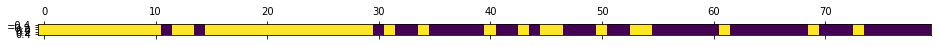

In [13]:
mask=select.get_support()
plt.matshow(mask.reshape(1,-1))
plt.show()

In [14]:
X_test_l1=select.transform(X_test)
print(lr.fit(X_train_l1,y_train).score(X_train_l1,y_train))
print(lr.score(X_test_l1,y_test))

0.971830985915
0.950877192982


In [15]:
#iterative feature selection

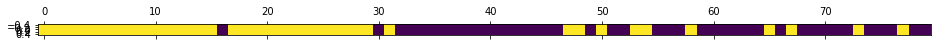

In [16]:
from sklearn.feature_selection import RFE

select=RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=40)
select.fit(X_train,y_train)

mask=select.get_support()
plt.matshow(mask.reshape(1,-1))
plt.show()

In [17]:
#wow, computational expense is MUCH higher

In [19]:
X_train_rfe=select.transform(X_train)
X_test_rfe=select.transform(X_test)
print(lr.fit(X_train_rfe,y_train).score(X_train_rfe,y_train))
print(lr.score(X_test_rfe,y_test))

0.964788732394
0.950877192982
